In [72]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
  

In [73]:
data = pd.read_csv('data.csv')
data

,,X,Y
0,A,2,6
1,B,3,4
2,C,3,8
3,D,4,7
4,E,6,2
5,F,6,4
6,G,7,3
7,H,7,4
8,I,8,5
9,J,7,6


In [74]:
data.shape

(13, 3)

In [75]:
X = data.iloc[:, [1, 2]].values


In [97]:
# Load data in X
db = DBSCAN(eps=3,min_samples =4).fit(X)
labels = db.labels_

In [98]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(labels)
  

[ 0  0  0  0  1  1  1  1  1  1 -1  1 -1]


['y', 'b', 'g', 'r']


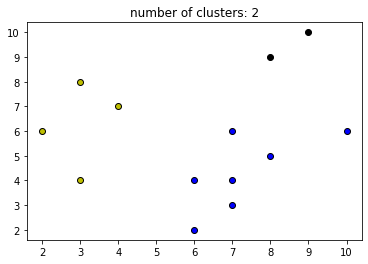

In [99]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                                      markeredgecolor='k', 
                                      markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                                      markeredgecolor='k',
                                      markersize=6)
  
plt.title('number of clusters: %d' %n_clusters_)
plt.show()